#  Word2Vec Model
## Dependencies and Corpus Collation

A vector is a kind of tensor

In [16]:
# dependencies
from __future__ import absolute_import, division, print_function
import codecs
import glob
import multiprocessing
import os
import pprint
import re
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import string
from nltk.corpus.reader import WordListCorpusReader
from cltk.tokenize.sentence import TokenizeSentence
tokenizer = TokenizeSentence('greek')

In [3]:
pip install gensim

     |████████████████████████████████| 24.7MB 213kB/s eta 0:00:01
     |████████████████████████████████| 71kB 7.5MB/s eta 0:00:011
     |████████████████████████████████| 133kB 6.9MB/s eta 0:00:01
     |████████████████████████████████| 6.0MB 7.4MB/s eta 0:00:01
     |████████████████████████████████| 71kB 8.6MB/s eta 0:00:011
  Created wheel for smart-open: filename=smart_open-1.9.0-cp37-none-any.whl size=73088 sha256=d52c63112550b5e4a1de206fdab3ba3c9d8ded8b8f59983304cf27abbf98656c
  Stored in directory: /Users/christinaoaks/Library/Caches/pip/wheels/ab/10/93/5cff86f5b721d77edaecc29959b1c60d894be1f66d91407d28
Successfully built smart-open
Note: you may need to restart the kernel to use updated packages.


In [2]:
# these will need to be the CLTK versions
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/nicklist/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nicklist/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Importing Local Corpora

In [13]:
# Importing local Corpora

import cltk
from cltk.corpus.utils.importer import CorpusImporter
my_greek_downloader = CorpusImporter('greek')

# this must be 'tlg', followed by orginal filepath
my_greek_downloader.import_corpus('tlg', '/Users/christinaoaks/Desktop/greekcorpos')

# see list of files

In [14]:
book_filenames = sorted(glob.glob('/Users/christinaoaks/cltk_data/originals/tlg/*.txt')) #file path
print(book_filenames)

['/Users/christinaoaks/cltk_data/originals/tlg/001.txt', '/Users/christinaoaks/cltk_data/originals/tlg/002.txt', '/Users/christinaoaks/cltk_data/originals/tlg/003.txt', '/Users/christinaoaks/cltk_data/originals/tlg/004.txt', '/Users/christinaoaks/cltk_data/originals/tlg/005.txt', '/Users/christinaoaks/cltk_data/originals/tlg/006.txt', '/Users/christinaoaks/cltk_data/originals/tlg/007.txt', '/Users/christinaoaks/cltk_data/originals/tlg/008.txt', '/Users/christinaoaks/cltk_data/originals/tlg/009.txt', '/Users/christinaoaks/cltk_data/originals/tlg/010.txt', '/Users/christinaoaks/cltk_data/originals/tlg/011.txt', '/Users/christinaoaks/cltk_data/originals/tlg/012.txt']


## Preprocessing and Tokenization

In [15]:
# individual files are placed into one long file (here, called corpus_raw)
# u'' makes it unicode, utf-8 is the unicode format
corpus_raw = u''
for book_filename in book_filenames:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, 'r', 'utf-8') as book_file:
        corpus_raw += book_file.read()
    print('Corpus is now {0} characters long'.format(len(corpus_raw)))
    print()

Reading '/Users/christinaoaks/cltk_data/originals/tlg/001.txt'...
Corpus is now 12058 characters long

Reading '/Users/christinaoaks/cltk_data/originals/tlg/002.txt'...
Corpus is now 23470 characters long

Reading '/Users/christinaoaks/cltk_data/originals/tlg/003.txt'...
Corpus is now 34448 characters long

Reading '/Users/christinaoaks/cltk_data/originals/tlg/004.txt'...
Corpus is now 43516 characters long

Reading '/Users/christinaoaks/cltk_data/originals/tlg/005.txt'...
Corpus is now 54266 characters long

Reading '/Users/christinaoaks/cltk_data/originals/tlg/006.txt'...
Corpus is now 81754 characters long

Reading '/Users/christinaoaks/cltk_data/originals/tlg/007.txt'...
Corpus is now 83167 characters long

Reading '/Users/christinaoaks/cltk_data/originals/tlg/008.txt'...
Corpus is now 90488 characters long

Reading '/Users/christinaoaks/cltk_data/originals/tlg/009.txt'...
Corpus is now 95454 characters long

Reading '/Users/christinaoaks/cltk_data/originals/tlg/010.txt'...
Corpus 

In [19]:
s = str(corpus_raw)

In [20]:
# Stops
from nltk.tokenize.punkt import PunktLanguageVars
from cltk.stop.greek.stops import STOPS_LIST

p = PunktLanguageVars()
tokens = p.word_tokenize(s.lower())
s2 = [w for w in tokens if not w in STOPS_LIST]
s3 = ' '.join(s2)

In [21]:
# remove commas and quotation marks
remover = s3.replace("'", '').replace(",", '').replace("(", '').replace(")", '')
s4 = str(remover).lower()

In [25]:
# finally, tokenize the sentences
raw_sentences = tokenizer.tokenize_sentences(s4)

In [26]:
# nummber of tokenized sentences
print(len(raw_sentences))

1129


In [ ]:
# view each tokenized sentence by line
for sentence in raw_sentences:
    print(sentence)
    print()

In [34]:
# coverts into a list of words
def sentence_to_wordlist(raw):
    clean = re.sub('[\W]', ' ', raw)
    words = clean.split()
    return words

In [35]:
# each sentence contains a list of words that is tokenized
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [36]:
# this is just to test the variables 
print(raw_sentences[61])
print(sentence_to_wordlist(raw_sentences[61]))

 ἀδελφοί μου  ζηλοῦτε προφητεύειν  λαλεῖν κωλύετε γλώσσαις·
['ἀδελφοί', 'μου', 'ζηλοῦτε', 'προφητεύειν', 'λαλεῖν', 'κωλύετε', 'γλώσσαις']


In [37]:
token_count = sum([len(sentence) for sentence in sentences])
print('The corpus contains {0:,} tokens'.format(token_count))

The corpus contains 12,108 tokens


## Train Word2Vec

Building the model

In [40]:
# This code defines the hyperparameter
# Dimensionality of the resulting word vectors. 
# The more vectors, the more computaionally extensive to train, but also more accurate.
num_features = 300

# Minimum word count threshold.
min_word_count = 3

# Number of threads to run in parallel.
num_workers = multiprocessing.cpu_count()

# Context window length. Note that Munson (2017: 17) says context_size is optimized at 12 for Greek.
context_size = 7

# Downsample setting for frequent words.
#rate 0 and 1e-5 
#how often to use
downsampling = 1e-3

# Seed for the RNG, to make the results reproducible. This is a random number generator
seed = 1

In [41]:
# rename this variable for Greek model
greek2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [42]:
greek2vec.build_vocab(sentences)

In [43]:
print('Word2Vec vocabulary length:', len(greek2vec.wv.vocab))

Word2Vec vocabulary length: 804


In [44]:
#train model on sentneces, this may take a while to process
greek2vec.train(sentences, total_examples=len(sentences), epochs=100)

(579878, 1210800)

## Save and Load Model

In [45]:
#save model
if not os.path.exists("trained"):
    os.makedirs("trained")

In [46]:
greek2vec.save(os.path.join("trained", "greek2vec.w2v"))

In [47]:
#load model
greek2vec = w2v.Word2Vec.load(os.path.join("trained", "greek2vec.w2v"))

## Scatterplot Representation


In [48]:
#squash dimensionality to 2-dimensions
#https://www.oreilly.com/learning/an-illustrated-introduction-to-the-t-sne-algorithm
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [49]:
#put it all into a giant matrix
all_word_vectors_matrix = greek2vec.wv.syn0

/Users/christinaoaks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  


In [50]:
#train t sne
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [51]:
#plot point in 2d space
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[greek2vec.wv.vocab[word].index])
            for word in greek2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [52]:
points.head(10)

,word,x,y
0,ταῖς,-5.560443,-17.311518
1,γλώσσαις,-23.244184,-11.922071
2,ἀνθρώπων,8.691706,-23.756657
3,λαλῶ,18.224779,-14.906912
4,ἀγγέλων,22.520727,-15.526992
5,ἀγάπην,10.831438,23.575706
6,ἔχω,15.530086,-15.725556
7,γέγονα,2.686630,-2.197969
8,πάντα,-0.698662,8.184798
9,πᾶσαν,-6.007385,15.231083


In [53]:
#plot
sns.set_context("poster")

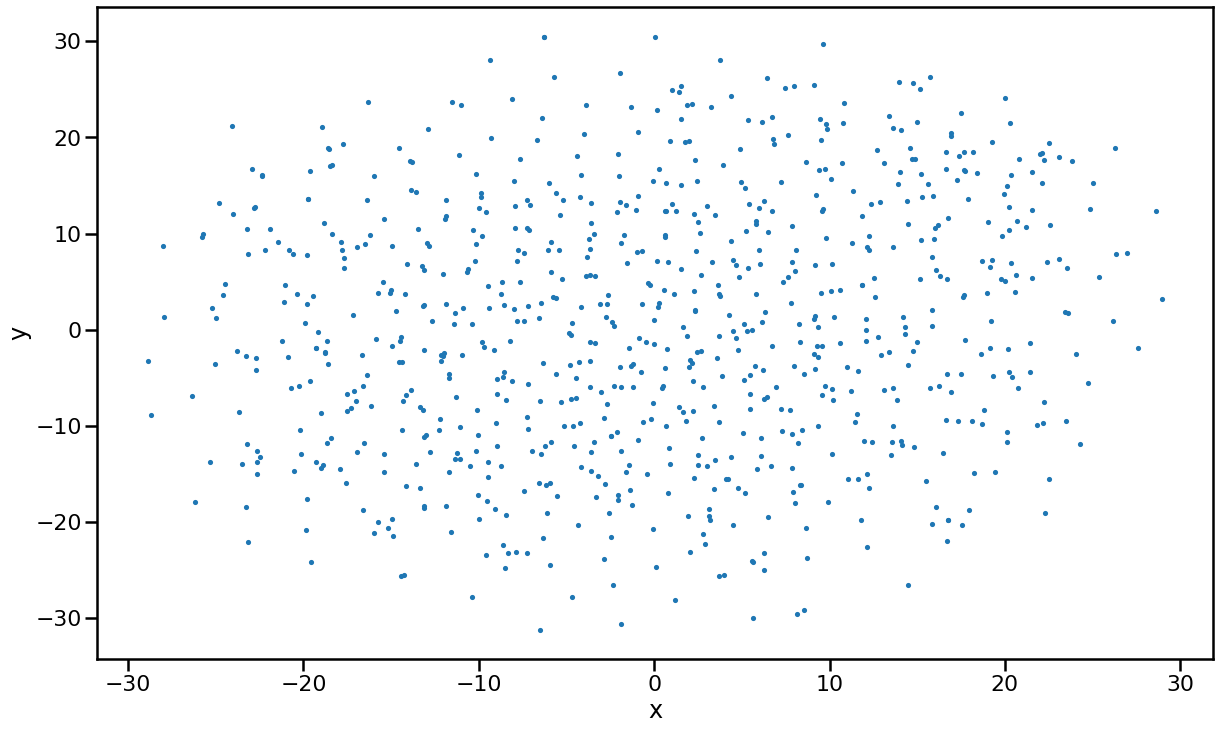

In [54]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [55]:
# this code zooms in to a part of the scatter plot
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

In [ ]:
# example coordinates for a particular region, the two numbers in the x_bounds and y_bounds are the parameters
plot_region(x_bounds=(0, 5), y_bounds=(0, --5))

In [ ]:
# example coordinates for another region
plot_region(x_bounds=(0, --10), y_bounds=(4, 4.5))

## Functions

In [60]:
# example function, computes the cosine similarity of the vectors
greek2vec.wv.most_similar(u"ἔχω")

[('γέγονα', 0.6880865693092346),
 ('μνείαν', 0.6548277735710144),
 ('γνῶσιν', 0.6149656772613525),
 ('πρότερον', 0.6063517332077026),
 ('σοῦ', 0.5759945511817932),
 ('λαλῶ', 0.5564455986022949),
 ('ἀγάπην', 0.542931318283081),
 ('ὄντα', 0.5365986824035645),
 ('σπούδασον', 0.5127383470535278),
 ('ἀδελφόν', 0.5084431171417236)]

In [61]:
#distance, similarity, and ranking
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = thrones2vec.wv.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [55]:
nearest_similarity_cosmul("Stark", "Winterfell", "Riverrun")
nearest_similarity_cosmul("Jaime", "sword", "wine")
nearest_similarity_cosmul("Arya", "Nymeria", "dragons")

Stark is related to Winterfell, as Tully is related to Riverrun
Jaime is related to sword, as strongwine is related to wine
Arya is related to Nymeria, as Pay is related to dragons


'Pay'